
# Projet d'Analyse des Données Astronomiques

## Énoncé du projet

Ce projet vise à analyser et modéliser des données astronomiques issues de l'observation des lunes, planètes, soleils et astéroïdes. 
L'objectif est d'explorer ces données pour :
- Comprendre les relations entre les caractéristiques physiques des objets célestes.
- Construire un modèle prédictif capable de classifier ou prédire certains attributs des objets.

### Étapes principales :
1. **Importation et exploration des données** : Charger et analyser les structures principales des jeux de données.
2. **Prétraitement des données** : Nettoyage et préparation des données pour les analyses ultérieures.
3. **Analyse exploratoire** : Identifier les relations et tendances via des visualisations.
4. **Modélisation et évaluation** : Construire un modèle de machine learning pour des prédictions ou classifications spécifiques.
5. **Conclusions et perspectives** : Synthétiser les résultats et proposer des axes d'amélioration.



In [1]:
import pandas as pd # type: ignore
import warnings
from IPython.display import display, HTML # Pour afficher les données dans Jupyter Notebook avec un format HTML
# ***********************   Librairie personnelle  **************************************
from utils import process_and_plot_graphs2,prepare_data_graph
from EcritureCSV import create_csv
from DataProcessing import Nbr_Moons2,get_unique_planet_types
from KNN import KNN_Classifier
from RandomForest import RandomForest2
from Evetools import TriData
from DeepLearning import Deep

ValeurRandom = 42

warnings.filterwarnings('ignore')

# Configuration globale pour pandas
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes
pd.set_option('display.max_rows', None)     # Afficher toutes les lignes
pd.set_option('display.width', 500)       # Largeur totale (éviter retour à la ligne)
pd.set_option('display.colheader_justify', 'left')  # Alignement à gauche des en-têtes
# Augmenter la largeur de la cellule dans Jupyter
display(HTML("<style>.container { width:100% !important; }</style>"))
 


## Importation et exploration des données

### Objectif :
Charger les données brutes et examiner leurs structures, dimensions, et caractéristiques globales.

### Méthodologie :
1. Charger les données à partir de `EveDataAI.csv` en utilisant des bibliothèques Python.
2. Diviser les données en catégories principales :
    - **df_moon** : Données sur les lunes.
    - **df_planet** : Données sur les planètes.
    - **df_sun** : Données sur les soleils.
    - **df_asteroid** : Données sur les astéroïdes.
3. Inspecter les colonnes, les valeurs manquantes et les types de données.

### Résultat attendu :
Une compréhension globale des données disponibles et leur organisation.


In [2]:
# Lecture des données à partir du fichier 'EveDataAI.csv'
tri_data = TriData('EveDataAI.csv')

# Séparation des données en quatre DataFrames :
# - df_moon : données relatives aux lunes.
# - df_planet : données relatives aux planètes.
# - df_sun : données relatives au soleil.
# - df_asteroid : données relatives aux astéroïdes.
df_moon, df_planet, df_sun, df_asteroid = tri_data.get_dataframes()

# Option : Sauvegarde des DataFrames dans des fichiers CSV pour analyse future
# Par exemple, sauvegarde des données concernant le soleil (df_sun)
# create_csv(df_sun, "df_sun.csv")

# Prétraitement des données des lunes (df_moon) :
# Suppression des colonnes inutiles 'spectralClass' (classe spectrale) et 'life' (vie) car non pertinentes pour l'analyse.
df_moon = df_moon.drop(columns=['spectralClass', 'life'], errors='ignore')

# Option : Sauvegarde des données prétraitées des lunes dans un fichier CSV
# create_csv(df_moon, "df_moon.csv")

# Prétraitement des données des planètes (df_planet) :
# Suppression de la colonne 'spectralClass' car elle n'apporte pas d'information utile à ce stade.
df_planet = df_planet.drop(columns=['spectralClass'], errors='ignore')
df_type_planet = get_unique_planet_types(df_planet)

# Sauvegarde des données prétraitées des planètes dans un fichier CSV.
#create_csv(df_planet, "df_planet.csv")

# Prétraitement des données des astéroïdes (df_asteroid) :
# Suppression des colonnes 'spectralClass' et 'life' car elles ne sont pas pertinentes pour l'analyse des astéroïdes.
df_asteroid = df_asteroid.drop(columns=['spectralClass', 'life'], errors='ignore')

# Option : Sauvegarde des données prétraitées des astéroïdes dans un fichier CSV
# create_csv(df_asteroid, "df_asteroid.csv")


✅ Colonne 'spectralClass' convertie en numérique.
✅ Colonne 'massDust' convertie en numérique.


 Affichage du dataset Moon   : On regarde la distribution pour toutes les lunes entre la densité et rayon afin de voir la distribution des valeurs sur l'ensemble du dataset


In [ ]:

SystemMoonEchantillon = df_moon

plot = SystemMoonEchantillon.hvplot.scatter(x='radius', y='density',label ='density').opts(xrotation=90,yaxis='left',color='blue')
plot


Étude de la corrélation entre la densité et le rayon des lunes d'un système solaire

Introduction :
L'objectif de cette étude est de déterminer si la répartition du ratio densité-rayon dans un système solaire suit une distribution aléatoire ou si elle obéit à une certaine logique mathématique.

Pour ce faire, nous travaillerons uniquement sur des données relatives aux lunes. Dans un premier temps, nous nous concentrerons sur les systèmes planétaires possédant plus de 7 lunes. Ensuite, nous sélectionnerons quelques exemples pour analyser si une logique sous-jacente peut être identifiée.

Pour cela nous identifier dans notre dataset, les systèmes solaire ayant plus de 7 lunes (choix impirique, mais qui donne suffisament de point pour une étude).



In [ ]:
SystemMoonEchantillon = df_moon
create_csv(SystemMoonEchantillon,'SystemMoonEchantillon.csv')
# création d'une dataframe pour les lunes qui donne le système et le nombre de lunes par planète
Moons = Nbr_Moons2(SystemMoonEchantillon)
# On filtre les lunes qui ont plus de 7 lunes
filtered_moons = Moons[Moons['MoonCount'] > 7]
# On affiche les données des 20 premières lunes ayant plus de 7 lunes
print(filtered_moons.head(20))
# On choisit plusieurs systèmes pour lesquels on veut afficher les lunes
# Jark V avec 18 lunes
# Akpivem III avec 8 lunes
# Sasta VIII avec 22 lunes
# Abai IV avec 16 lunes
# Chidah V avec 10 lunes

Graph1_Moons_Name = ['Jark V','Akpivem III','Sasta VIII','Abai IV','Chidah V']
# Préparation des données pour le graphique
Graph_Moons_Dict = {}
Label_Curve_Dict = {}
for i,name in enumerate(Graph1_Moons_Name,start=1):
    pattern = rf'\b{name}\b'
    Graph_Moons_Dict[f'Graph{i}_Moons'] = SystemMoonEchantillon[
    SystemMoonEchantillon['itemName'].str.contains(pattern, case=False, na=False)] 
    Label_Curve_Dict[f'{i}'] = name
# on crée un graphique du système planétaire Chidah V afin de voir la répartion de ces lunes dans un graphique.
Graph_Moons_Dict['Graph1_Moons'].hvplot.scatter(x='radius', y='density',label =Label_Curve_Dict[str(i)]).opts(xrotation=90,yaxis='left',color='blue',height=600,width=1200,fontsize={'title': 15, 'labels': 10, 'xticks': 15, 'yticks': 10})

Suite au graphique du système de Chidah V, il semble qu'une relation polynomiale se dessine. Pour vérifier cette hypothèse, nous allons représenter l'ensemble de notre échantillonnage sur un graphique en utilisant une distribution polynomiale de degré 4 (valeur déterminée après essais).

Je rappelle que l'ensemble des systèmes solaires a été sélectionné de manière aléatoire.


In [ ]:
plot = process_and_plot_graphs2(Graph_Moons_Dict, Label_Curve_Dict,4)
plot

Conclusion de l'analyse des lunes : Il est intéressant de noter qu'il existe une relation mathématique significative entre le rayon (radius) et la densité. Cela tend à démontrer que les données ne sont pas aléatoires.

Nous allons donc pousser l'analyse sur les Planètes afin de voir ce qu'il est possible d'analyser.

# *****************************************************************************************************************************************************

Début de l'anayse des Planètes :

Il existe plusieurs type de planète dans notre dataset, afin de confirmer le fait que ces données ne sont pas complètement aléatoire, nous allons faire un graphique pour voir si le dispatching des planètes de même type a une répartition aléatoire ou pas.

On regarde si la répartition des données radius, gravity par type de planète à un sens. Voir si il est possible que cela représente des clusters de planète type.
On prendra en analyse des types de planète ayant des caractéristiques très opposées pour valider.

Planète de type : Lava , Gas , Ice la density doit être très différente


In [ ]:
# Copie du set de données
#df_planet_gas,df_planet_lava,df_planet_ice = df_planet,df_planet,df_planet
# On filtre les données

Graph1 = prepare_data_graph(df_planet,'Gas','radius','density')
Graph2 = prepare_data_graph(df_planet,'Lava','radius','density')
Graph3 = prepare_data_graph(df_planet,'Ice','radius','density')

desc_graph1 = Graph1.describe().add_prefix('Gas_')
desc_graph2 = Graph2.describe().add_prefix('Lava_')
desc_graph3 = Graph3.describe().add_prefix('Ice_')

# Combine into a single DataFrame
comparison = pd.concat([desc_graph1, desc_graph2, desc_graph3], axis=1)

# Display the comparison
print(comparison)
# Create scatter plots
scatter_gas = Graph1.hvplot.scatter(x='radius', y='density', label='Gas Density', color='blue').opts(xrotation=90, yaxis='left')
scatter_lava = Graph2[['radius', 'density']].hvplot.scatter(x='radius', y='density', label='Lava Density', color='red').opts(xrotation=90, yaxis='left')
scatter_ice = Graph3[['radius', 'density']].hvplot.scatter(x='radius', y='density', label='Ice Density', color='green').opts(xrotation=90, yaxis='left')
# Combine the three plots
combined_plot = scatter_gas * scatter_lava  * scatter_ice

# Show the combined plot
combined_plot
# sns.pairplot(SystemPlaneteEchantillon, hue='TypeCoreName')

On peut voir qu'il existe bien zone de forte densité pour chaques type de planète. Nous allons donc utiliser les méthodes de classification pour voir si un modèle peut-être utilisé pour déterminer le type de planète en fonction de paramètre disponible dans le dataset. 

Pour ce faire nous allons utilisés trois méthodes :

    * K-NN en Classification
    * Random Forest
    * Deep Learning



Description de la fonction KNN_Classifier

La fonction KNN_Classifier est conçue pour effectuer une classification supervisée à l'aide de l'algorithme des k-plus proches voisins (k-NN). Elle inclut des étapes de prétraitement, de gestion des déséquilibres via SMOTE, et de sélection optimale des hyperparamètres pour le modèle. Voici un aperçu des étapes et méthodes utilisées :
Étapes principales
1. Filtrage des classes

Les classes ayant moins d'exemples qu'un seuil minimal (Echantillon_min) sont filtrées. Cette étape garantit que seules les classes avec une quantité suffisante de données sont utilisées dans l'analyse.
2. Préparation des données

    Les colonnes d'entrée (X_Chara) et la cible (Y_Target) sont transformées via la fonction Calcul_XX_YY, qui encode les valeurs cibles et prépare les données pour l'entraînement.
    Les données d'entrée sont standardisées à l'aide de StandardScaler, ce qui est essentiel pour les modèles k-NN, qui utilisent des distances dans leurs calculs.

3. Division des données

Les données sont divisées en ensembles d'entraînement et de test à l'aide de la fonction split_data. Cela permet une évaluation indépendante du modèle.
4. Équilibrage des classes avec SMOTE

Si l'option smote_status est activée :

    SMOTE est utilisé pour générer des exemples synthétiques pour les classes sous-représentées.
    La répartition des classes après SMOTE est affichée pour validation.

5. Réduction de dimensionnalité (PCA)

Si l'option PCA_State est activée :

    Une analyse en composantes principales (PCA) est effectuée pour réduire la dimensionnalité des données, tout en conservant un pourcentage spécifié de variance (variance).
    Les ensembles d'entraînement et de test sont transformés dans l'espace réduit.

6. Optimisation des hyperparamètres

L'algorithme k-NN est paramétré via GridSearchCV, qui explore les meilleures combinaisons des hyperparamètres suivants :

    n_neighbors : Nombre de voisins à considérer.
    weights : Méthode pour pondérer les voisins (uniforme ou basée sur la distance).
    metric : Mesure de distance (euclidienne, manhattan, minkowski).
    Le nombre optimal de voisins (k) est sélectionné en fonction de la précision (accuracy).

7. Entraînement et prédictions

    Le modèle k-NN avec les meilleurs hyperparamètres est entraîné sur l'ensemble d'entraînement.
    Les prédictions sont effectuées sur les ensembles d'entraînement et de test.

8. Évaluation des performances

Les performances sont mesurées à l'aide des métriques suivantes :

    Accuracy (précision) sur les ensembles d'entraînement et de test.
    Classification report (précision, rappel, F1-score par classe).
    Les probabilités de prédiction sont également calculées pour l'ensemble de test.

9. Affichage des graphiques

Plusieurs visualisations sont générées pour interpréter les résultats du modèle :

    Matrice de confusion : Analyse des erreurs de classification.
    Courbe ROC : Évaluation des performances pour chaque classe.
    Courbe d'apprentissage : Mesure de la capacité d'apprentissage et de généralisation.
    Distribution des probabilités de prédiction : Visualisation des probabilités par classe.

10. Sauvegarde des résultats

Si l'option Save_Model est activée :

    Le modèle entraîné et ses paramètres sont sauvegardés.
    Les graphiques générés (matrice de confusion, courbe ROC, etc.) sont enregistrés.
    Les résultats, y compris les métriques et hyperparamètres, sont archivés pour une consultation ultérieure.


In [ ]:
#for j in (5,26,5):
#   for i in np.arange(0.55, 0.95 + 0.05, 0.1):
Valeur_CV =3                # Nombre de cross validation
Variance = 0.95             # Variance pour le PCA
Echantillon_min = 100       # nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
PCA_State = False           # Choix si le PCA est utilisé ou pas permet de comparer l'effet du PCA sur l'accuracy
Y_Target = 'TypeCoreName'   # Analyse du type de planète
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust', 'density', 'escapeVelocity'] # Paramètre pris en compte pour le training 
neighbor_max = 20           # Nombre de voisin pour le KNN
smote_status = True         # Activation du SMOTE
sampling_number = 7200      # Nombre d'échantillon pour le SMOTE
sampling_strategy = True    # Stratégie de la distribution des données pour le SMOTE
Save_Model  = True          # Sauvegarde du modèle

if smote_status== False:        # Si le SMOTE est désactivé
    sampling_strategy = False   # La stratégie de distribution est désactivée
    sampling_number = 0         # Le nombre d'échantillon est à 0

if sampling_strategy == False:  # Si la stratégie de distribution est désactivée
    sampling_number = 0         # Le nombre d'échantillon est à 0

# Grouper par 'TypeCoreName' et compter les occurrences de chaque type
typecore_count = df_planet['TypeCoreName'].value_counts()
typecore_table = typecore_count.to_frame().T  # Vision Horizontal
print(typecore_table)

# KNN_Classifier(df_planet,Echantillon_min,Valeur_CV,Variance,X_Chara,Y_Target,PCA_State,neighbor_max,Save_Model) 
KNN_Classifier(smote_status,sampling_number,sampling_strategy,df_planet,Echantillon_min,Valeur_CV,Variance,X_Chara,Y_Target,PCA_State,neighbor_max,Save_Model)

Observation sur KNN en classification :

On peut observer un sur entrainement la différence entre accuracy et le training accuracy et trop importante, même en modifiant les paramètres de variance et cv. La différence n'est pas flagrante. Je pense que l'un des soucis vient aussi du nombre trop restraint de donnée dans mon dataset. 

Néantmoins on peut quand même en tirer des enseignements, la Matrix de confusion donne une idée clair des types de planètes ayant une bonne prédiction. 

    Très Bonne prédiction : Planète Lava, Shattered, Gas 
    
    Après pour les autres catégorie, on peut observer des erreurs sur leur classification :

        Barren  : une partie du set a été déterminé comme Temperate
        Ice     : La plus grande partie du dataset est prédit dans Gas et non pas dans Ice
        Oceanic : La prédiction est splitter en principalement 3 catégories : Barren , Oceanic, Temperate
        Etc ... 

On attends un peu la limite du K-NN avec le set de donnée disponible. Il faudrait soit plus de donnée soit plus de paramètre déterminant pour améliorer l'analyse avec ce modèle.

  

L'historique des simulations et des entrainements sont disponible dans le répertoire KNN

**************************************************************************************************************************

On observe une amélioration de l'accuracy, mais au détriment de certains recalls, comme pour les planètes de type Barren. Il me semble que l'ajout de données améliore la détection de certaines planètes au détriment des autres, ce qui n'était pas l'objectif initialement recherché. Néanmoins, il faut admettre que l'amélioration globale du modèle est indéniable.

***************************************************************************************************************************************

Description de la fonction RandomForest2

La fonction RandomForest2 est conçue pour effectuer une classification supervisée à l'aide d'un modèle Random Forest. Elle intègre plusieurs étapes clés, de la prétraitement des données à l'évaluation des performances, avec des options pour gérer les déséquilibres de classes via SMOTE (Synthetic Minority Oversampling Technique). Voici les étapes détaillées et les méthodes utilisées :
Étapes principales
1. Filtrage des classes

Les classes avec un nombre d'exemples inférieur à un seuil minimal (Echantillon_min) sont supprimées du jeu de données pour garantir une représentativité minimale. Cela aide à éviter les biais extrêmes dans l'entraînement du modèle.
2. Calcul des données d'entrée et de sortie

La fonction Calcul_XX_YY transforme les colonnes sélectionnées (X_Chara) en caractéristiques (XX) et définit la cible (YY) à partir de la colonne spécifiée (Y_Target). Elle retourne également un encodeur pour convertir les classes en valeurs numériques.
3. Division des données

Les données sont divisées en ensembles d'entraînement et de test via la fonction split_data. Cela permet de réserver une partie des données pour évaluer les performances du modèle après l'entraînement.
4. Gestion des déséquilibres de classes avec SMOTE

    Si smote_status est activé, la fonction applique SMOTE sur l'ensemble d'entraînement pour générer des exemples synthétiques pour les classes sous-représentées.
    Étapes importantes avec SMOTE :
        Calcul de la stratégie d'échantillonnage via sampling.
        Application de SMOTE pour équilibrer les classes.
        Affichage de la répartition des classes après équilibrage.
    Si SMOTE n'est pas utilisé, les données d'entraînement restent inchangées.

5. Modèle et optimisation des hyperparamètres

    Un modèle Random Forest est initialisé avec une gestion automatique des poids de classe (class_weight='balanced').
    Les hyperparamètres du modèle sont optimisés à l'aide de GridSearchCV avec validation croisée (paramétrée par grid_data et cv_data).
    Le meilleur modèle et ses hyperparamètres sont récupérés via grid_search.best_estimator_.

6. Évaluation du modèle

Le modèle est évalué sur les ensembles d'entraînement et de test :

    Rapports de classification et accuracy pour les ensembles d'entraînement et de test.
    Prédictions des probabilités pour l'ensemble de test.

7. Affichage des résultats

Plusieurs visualisations sont générées pour évaluer le modèle :

    Matrice de confusion : Analyse des erreurs de classification.
    Courbe ROC : Évaluation des performances du modèle pour chaque classe.
    Courbe d'apprentissage : Mesure de la généralisation et de la capacité d'apprentissage.
    Distribution des probabilités de prédiction : Analyse de la confiance du modèle.

8. Sauvegarde des résultats

Si l'option Save_Model est activée, les résultats suivants sont sauvegardés :

    Modèle entraîné.
    Hyperparamètres optimaux.
    Rapports et graphiques (matrice de confusion, courbe ROC, etc.).
    Données des hyperparamètres et métriques.

TypeCoreName  Planet (Gas)  Planet (Barren)  Planet (Temperate)  Planet (Lava)  Planet (Storm)  Planet (Ice)  Planet (Oceanic)  Planet (Plasma)  Planet (Shattered)  Planet (Scorched Barren)
count         20262         19714            7200                6611           5569            3324          3036              1531             713                 1                       



Classes encodées : ['Planet (Barren)', 'Planet (Gas)', 'Planet (Ice)', 'Planet (Lava)', 'Planet (Oceanic)', 'Planet (Plasma)', 'Planet (Shattered)', 'Planet (Storm)', 'Planet (Temperate)']
------- Entête Y prise en compte ---------------------------
temperature | radius | orbitRadius | massGas | rotationRate | massDust | density | escapeVelocity | 
------------------------------------------------------------
Meilleurs hyperparamètres : {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 37}
--------------------------------------------------------------------

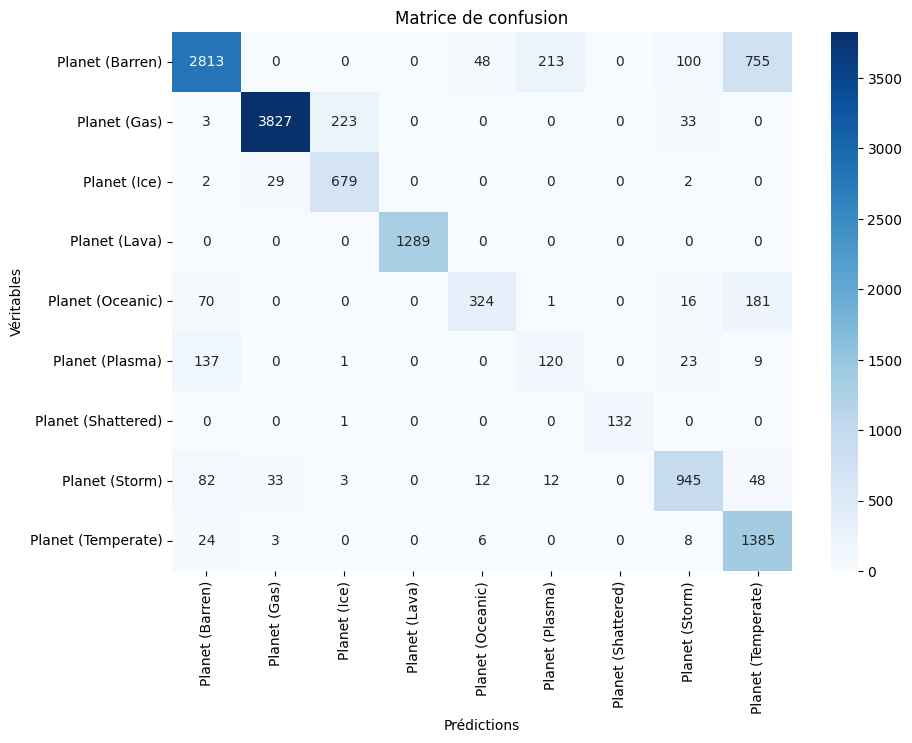

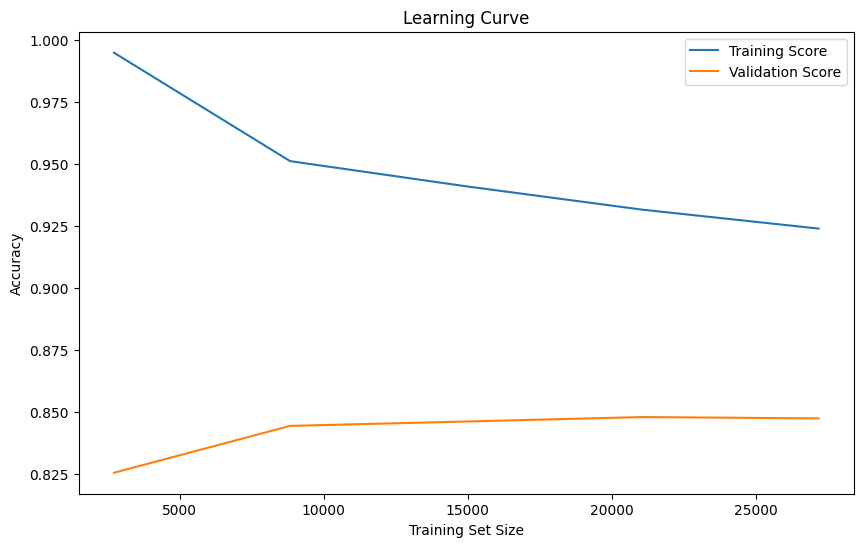

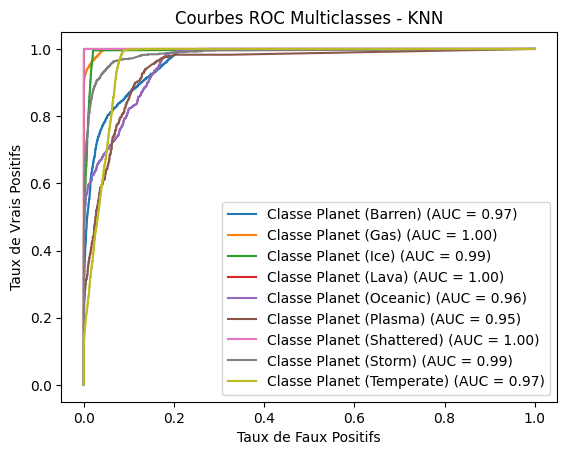

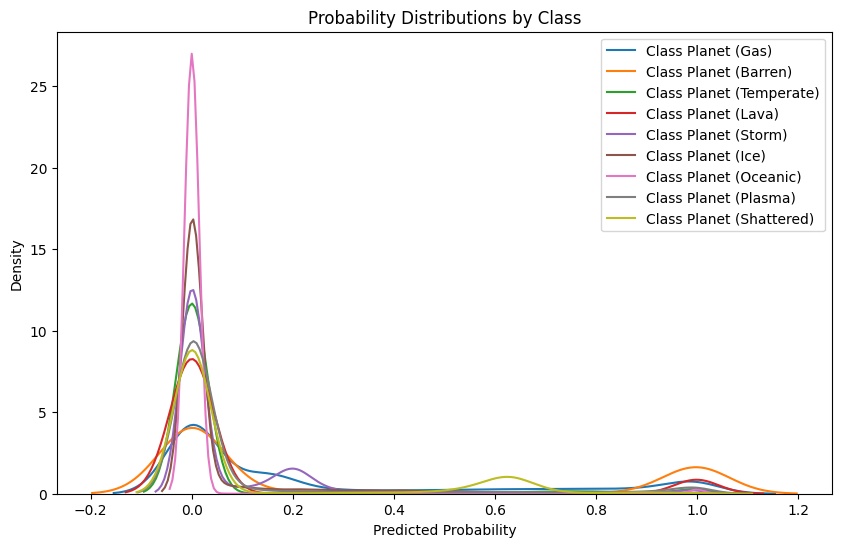

Fichiers sauvegardés dans RF\Without-Smote-CV=2-2025-01-07_18-54-54.zip
Base de données 'data.db' ouverte avec succès dans 'g:\python\Eve projet\Certification XXV\data.db'.
Table 'RF_data' créée ou déjà existante.
Données insérées avec succès dans la table RF_data.


In [12]:
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity']
Echantillon_min = 100        # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
smote_status = False         # True pour utiliser SMOTE, False pour ne pas utiliser SMOTE
sampling_strategy = False     # Stratégie de la distribution des données pour le SMOTE
sampling_number = 7200       # Nombre d'échantillon pour le SMOTE
Save_Model = True            # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire RF 

if smote_status== False:        # Si le SMOTE est désactivé
    sampling_strategy = False   # La stratégie de distribution est désactivée
    sampling_number = 0         # Le nombre d'échantillon est à 0

if sampling_strategy == False:  # Si la stratégie de distribution est désactivée
    sampling_number = 0         # Le nombre d'échantillon est à 0
"""
for i in range(5, 12, 2): 
    CV_data = i 

    param_grid = {
    'n_estimators': [25,50,75,100,125],
    'max_depth': [15],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt', 'log2']
    }
    
"""
# Simulation avec les paramètres suivants pour la Random Forest 
smote_status = False
sampling_strategy = False
sampling_number = 0
CV_data = 2                  
param_grid = {'n_estimators': [37],'max_depth': [20],'min_samples_split': [2],'min_samples_leaf': [1],'max_features': ['sqrt', 'log2']}

# On utilise le dataset des planètes voir si la RandomForest donne un résultat plus intéressant que la méthode K-NN
df_data = df_planet.copy()
    
# Grouper par 'TypeCoreName' et compter les occurrences de chaque type
typecore_count = df_planet['TypeCoreName'].value_counts()
typecore_table = typecore_count.to_frame().T  # Vision Horizontal
print(typecore_table)
print(f"\n\n")

RandomForest2(sampling_strategy,sampling_number,smote_status,df_data,param_grid,CV_data,X_Chara,Y_Target,Echantillon_min,Save_Model)

In [ ]:
Echantillon_min=100     # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity']
Smote_State = False     # Activation de la fonction Smote, Rééquilibrage des classes
Weight_Class = False    # Activation du poids des classes
Adjust_Factor = 1.5     # Facteur d'ajustement pour le poids des classes (Seul deux classes sont impactées) Barren et Oceanic
Epoque = 200            # Nombre d'époques    
batch_size_nbr = 64     # Taille du batch 64
Learning_Rate = 0.0010  # Taux d'apprentissage
Save_Model = True       # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire DP


Deep(Smote_State,df_planet,Echantillon_min,Y_Target,X_Chara,Weight_Class,Adjust_Factor,Epoque,batch_size_nbr,Learning_Rate,Save_Model)